# Cosine Wave Demo

A cosine-wave signal $s(t)$ with amplitude $A$, frequency $f$, and phase $\phi$ is defined by
\begin{align}
    s(t) = A \cos(2\pi ft + \phi) \quad .
\end{align}

### Frequency and period, phase and delay

The period $T$ of the signal is the time it takes to complete one cycle. This ocurs when the instantaneous phase $2\pi ft + \phi$ has changed by $2\pi$,
\begin{align}
    2\pi f(t+T) + \phi  &= 2\pi ft + \phi + 2\pi \\
    T & = \frac{1}{f}  \quad .
\end{align}

The delay $t_d$ is the time-shift relative to a wave with phase $\phi=0$, 
\begin{align}
    2\pi f(t-t_d)  &= 2\pi ft + \phi \\
    t_d & = -\frac{\phi}{2\pi f}  \quad .
\end{align}
Note the negative sign, this is caused by the definition: A positive delay $t_d$ corrsponds to a negative phase $\phi$.

### Sampling
To obtain a discrete signal suitable for processing in digital systems, the signal is sampled at discrete time-points spaced by the sampling interval $T_s$. The resulting signal is written $s[n]$ where $n$ is tne sample number and $n$ is an integer. It is often convenent to start at $n=0$, but  this is not necessary, that depends on the definition of where $t=0$. In some cases it may be convenient to include negative values for $n$.

The time at the sample ponts is $t_n = n T_s$, giving the sampled signal $s[n]$ as
\begin{align}
    s[n] = s(t_n) = s(n T_s) = A \cos(2\pi f n T_s + \phi) \quad .
\end{align}
This is often formulated with the normalised frequency $\hat \omega = 2\pi f T_s$ as
\begin{align}
    s[n] = A \cos(\hat\omega n  + \phi) \quad .
\end{align}

The sampling is most often described by the *sample rate* or *sample frequency* $f_s$ instead of the sampling intereval $T_s$, the relation between these is 
\begin{align}
    T_s = \frac{1}{f_s} \quad .
\end{align}
The signal and normalised frequency can be formulated with the sample rate as
\begin{align}
    s[n] &=  A \cos \left( 2\pi n \frac{f}{f_s} + \phi \right) = A \cos(\hat\omega n  + \phi) \quad , & \hat \omega &= 2\pi \frac{f}{f_s} \quad .
\end{align}
From this it can be seen that the normalised frequency $\hat \omega$ is the change in instantaneous phase between two sample points. If wieved as a phasor in the complex plane, a change of $\pi$ corresponds to rotating half a circle. In this case, the signal will be misinterpreted as a lower frequency. This is called *aliasing* and occurs when $\hat \omega > \pi$, or $f > \tfrac12 f_s$. 

The aliasing phenomenon will handled in detail in later lectures.



In [2]:
""" Demonstrate a cosine-wave

Illustrate the parameteres amplitude, frequency and phase, and relate them to period and delay.
Include sampling and normalized frequency 
"""

import numpy as np
from math import pi
import matplotlib.pyplot as plt

# Allow interactive figures in Matplotlig
%matplotlib ipympl

class CosineDemo:
    """Demonstation of cosine-wave.

    All calculations and plotting routines are contained in this class
    """

    def __init__(self, A=1, f=1, phase=0):
        """Initialise system parameters."""
        self.A = A            # Amplitude
        self.f = f            # Frequency
        self.fs = 10          # sample rate
        self.phase = phase    # Phase [degrees]
        self.t_min = -0.5     # Start time
        self.t_max = 2.0      # End time
        self.A_max = 2.0      # Max. amplitude on plot
        self.show_samples = True  # Show or hide samples, as stem-plot
        self.ax = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)
        fig = plt.figure(figsize=[10, 4],
                         constrained_layout=True,
                         num="Cosine wave demo")
        ax = fig.add_subplot(1, 1, 1)

        ax.set(xlabel=r"Time $t$ [s]",
               ylabel=r"$s(t)$",
               title=r"$s(t)=Acos(2\pi f t + \phi)$",
               xlim=(self.t_min, self.t_max),
               ylim=self.A_max*np.array([-1, 1]))
        ax.grid(False)

        return ax

    def T(self):
        """Period of wave."""
        return 1/self.f

    def phi(self):
        """Phase in radians."""
        return np.radians(self.phase)

    def t(self):
        """Create time vector for 'continous' signal."""
        return np.linspace(self.t_min, self.t_max, 300)

    def ts(self):
        """Create time vector for samples."""
        return np.arange(self.t_min, self.t_max, 1/self.fs)

    def _cos_wave(self, A, f, t, phi):
        """Calculate cosine-wave, internal use. """
        s = A * np.cos(2*pi*f*t + phi)
        return s

    def s(self):
        """Get continous cosine-wave."""
        s = self._cos_wave(self.A, self.f, self.t(), self.phi())
        return s

    def ss(self):
        """Get sampled cosine-wave."""
        ss = self._cos_wave(self.A, self.f, self.ts(), self.phi())
        return ss

    def plot(self):
        """Plot result in graph."""
        # Remove old plots and markers
        for art in list(self.ax.lines):
            art.remove()
        for art in list(self.ax.collections):   # Stem plots are collections
            art.remove()
        for art in list(self.ax.texts):
            art.remove()

        # Plot signal
        self.ax.plot(self.t(), self.s(), "-", color="C0")
        if self.show_samples:
            self.ax.stem(self.ts(), self.ss(), "-", linefmt="C0")

        # Markers and annotations
        self.ax.axvline(0, color="gray")  # Line at t=0
        self.ax.axhline(0, color="gray")  # Line at s=0

        y_text = 1.1*self.A  #  y-position of markers and texts
        id = np.ones(2)      #  Array [1, 1] to draw lines
        rot = 5              #  Rotation of text 

        # Amplitude marker
        col = "C3"
        t0 = (1-self.phi()/(2*pi))/self.f  # Position of wave-crest, phase=2*pi
        self.ax.stem(t0, self.A, linefmt=col)
        self.ax.text(t0, self.A,
                     f" Amplitude= {self.A:.2f}",
                     color=col,
                     horizontalalignment="left",
                     rotation = rot,
                     verticalalignment="bottom")

        # Period marker
        t0 = (1-self.phi()/pi)/(2*self.f)  # Position of wave-through, phase=pi
        self.ax.plot([t0, t0+self.T()], -self.A*id, "-|", color=col)
        self.ax.text(t0+self.T()/2, -y_text,
                     f" Period $T= 1/f=${self.T():.2f} s",
                     color=col,
                     horizontalalignment="center",
                     verticalalignment="top")

        # Delay marker
        t_d = -self.phi()/(2*pi*self.f)  # Position of wave-crest, phase=0
        self.ax.plot([0, t_d], self.A*id, "-|", color=col)
        self.ax.text(t_d, self.A,
                     fr" Delay $t_d=-\phi/(2\pi f)=${t_d:.2f} s",
                     color=col,
                     horizontalalignment="left",
                     rotation = rot,
                     verticalalignment="bottom")

        # Sample rate text
        if self.show_samples:
            textstr = '\n'.join([rf'$f_s= {self.fs/self.f:.1f} f_0$',
                                 rf'$T_s= {1/self.fs:.2f} $ s',
                                 rf'$\hat \omega= {2*self.f/self.fs:.2f} \pi $ radians']) 

            self.ax.text(0.85, 0.95, textstr, 
                         transform=self.ax.transAxes,
                         verticalalignment='top', 
                         bbox=dict(boxstyle='round', facecolor='aliceblue', alpha=0.50))

        return 0


Label(value='Cosine wave demo', style=LabelStyle(font_weight='bold'))

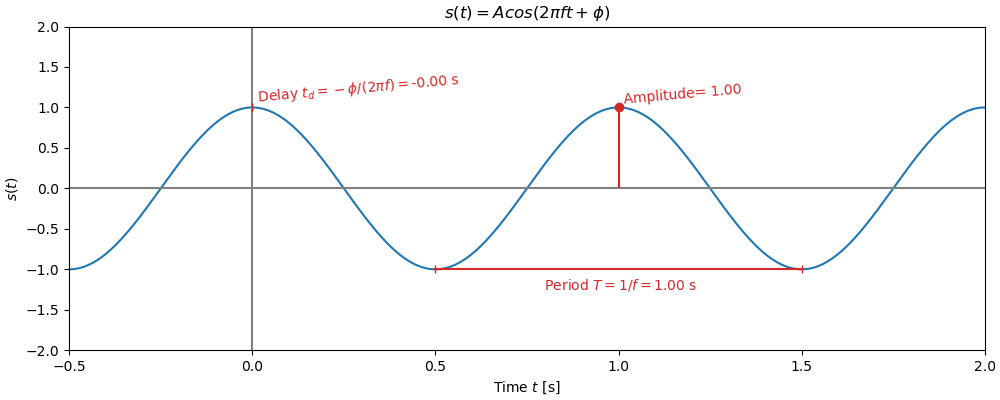

In [3]:
# Widgets to display the results interctively

# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_cosinedemo(A, f, phase, fs, show_samples):
    """Set values and call plotting function."""
    signal.A = A
    signal.f = f
    signal.phase = phase
    signal.fs = fs
    signal.show_samples = show_samples
    signal.plot()
    
    return

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("Cosine wave demo", 
                             style=dict(font_weight='bold'))

A_widget = widgets.FloatSlider(min=0, max= 2, value=1.0, step=0.01, 
                                 description='Amplitude ',  
                                 readout_format='.2f',
                                 layout=widgets.Layout(width='60%'),
                                 orientation='horizontal',
                                 style=widget_style)

f_widget = widgets.FloatSlider(min=0.1, max= 5, value=1, step=0.01, 
                                 description='Frequency [Hz]',  
                                 readout_format='.2f',
                                 layout=widgets.Layout(width='60%'), 
                                 style=widget_style)

phase_widget = widgets.FloatSlider(min=-360, max= 360, value=0, step=5, 
                                 description='Phase [deg]',  
                                 readout_format='.0f',
                                 layout=widgets.Layout(width='60%'),
                                 style=widget_style)

fs_widget = widgets.FloatSlider(min=0.5, max= 50, value=10, step=0.5,
                                     description='Sample Rate [samples/s]',  
                                     readout_format='.1f',
                                     layout=widgets.Layout(width='40%'), 
                                     style=widget_style)

show_samples_widget = widgets.ToggleButton(value=False,
                                           description='Show samples',
                                           button_style='info', 
                                           layout=widgets.Layout(width='10%'))


widget_line_1 = widgets.HBox([fs_widget, show_samples_widget])

widget_box = widgets.VBox([widget_line_1, A_widget, f_widget, phase_widget ])

display(title_widget)
display(widget_box)

# Define signal and run demo
signal = CosineDemo()
w = widgets.interactive(run_cosinedemo, A=A_widget, f=f_widget, phase=phase_widget, fs=fs_widget, show_samples=show_samples_widget)